In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("amazon.csv",encoding="iso-8859-1",parse_dates=["date"])

In [7]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [8]:
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [9]:
data.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [10]:
data.shape

(6454, 5)

In [11]:
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 6454
Number of columns: 5


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [13]:
dup_data = data.duplicated().any()

In [14]:
print("Are there any duplicated values in the data:",dup_data)

Are there any duplicated values in the data: True


In [16]:
data=data.drop_duplicates()

In [17]:
data.shape

(6422, 5)

In [18]:
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 6422
Number of columns: 5


In [20]:
6454-6422

32

In [19]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [24]:
data.describe(include="all")

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Setembro,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [25]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [26]:
data["month_new"] = data["month"].map({"janeiro":"jan","fevereiro":"feb","Marco":"march","Abril":"april","Maio":"may","junho":"jun","julho":"july","agosto":"august","Setembro":"sep","Outubro":"oct","Novembro":"nov","Dezembro":"dec"})

In [27]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,NaN
1,1999,Acre,Janeiro,0.0,1999-01-01,NaN
2,2000,Acre,Janeiro,0.0,2000-01-01,NaN
3,2001,Acre,Janeiro,0.0,2001-01-01,NaN
4,2002,Acre,Janeiro,0.0,2002-01-01,NaN


In [31]:
data1=data.groupby("month_new")["number"].sum().reset_index()
data1

,month_new,number
0,april,28184.770
1,dec,57535.480
2,may,34725.363
3,nov,85508.054
4,oct,88681.579
5,sep,58578.305


<Axes: xlabel='month_new', ylabel='number'>

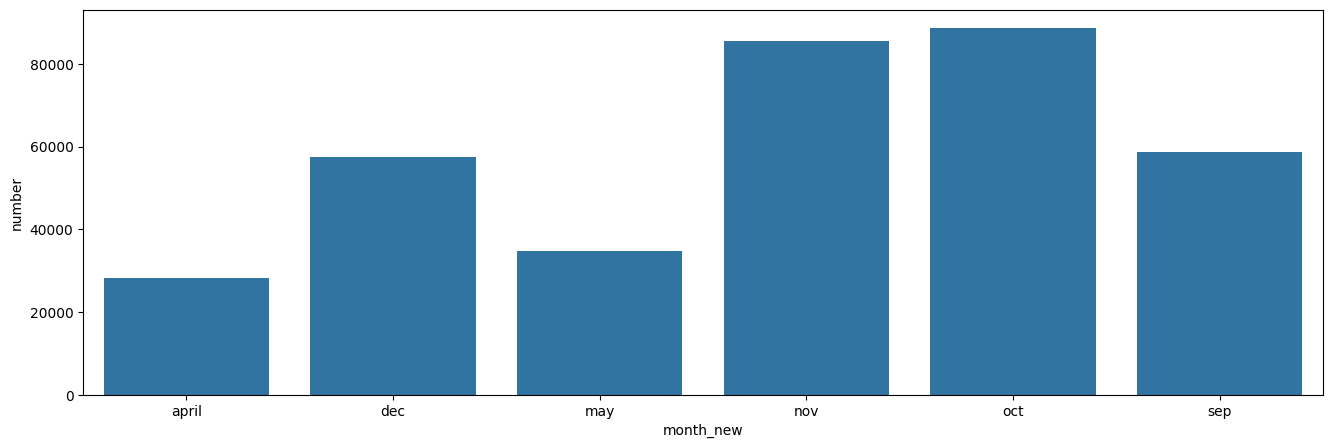

In [32]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=data1)

In [33]:
data2=data.groupby("year")["number"].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

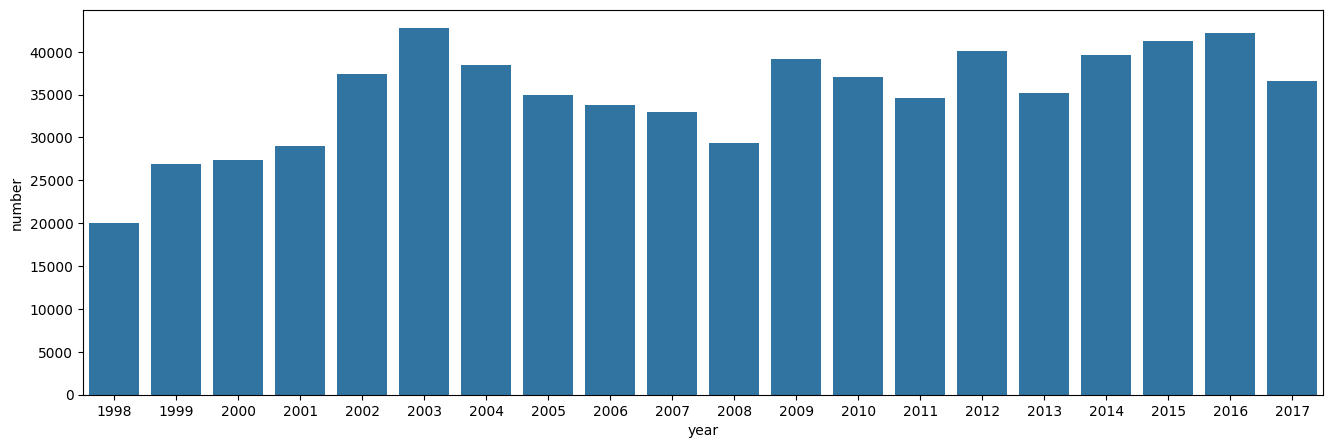

In [35]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data2)

In [36]:
data3=data.groupby("state")["number"].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Acre'),
  Text(1, 0, 'Alagoas'),
  Text(2, 0, 'Amapa'),
  Text(3, 0, 'Amazonas'),
  Text(4, 0, 'Bahia'),
  Text(5, 0, 'Ceara'),
  Text(6, 0, 'Distrito Federal'),
  Text(7, 0, 'Espirito Santo'),
  Text(8, 0, 'Goias'),
  Text(9, 0, 'Maranhao'),
  Text(10, 0, 'Mato Grosso'),
  Text(11, 0, 'Minas Gerais'),
  Text(12, 0, 'Paraiba'),
  Text(13, 0, 'Pará'),
  Text(14, 0, 'Pernambuco'),
  Text(15, 0, 'Piau'),
  Text(16, 0, 'Rio'),
  Text(17, 0, 'Rondonia'),
  Text(18, 0, 'Roraima'),
  Text(19, 0, 'Santa Catarina'),
  Text(20, 0, 'Sao Paulo'),
  Text(21, 0, 'Sergipe'),
  Text(22, 0, 'Tocantins')])

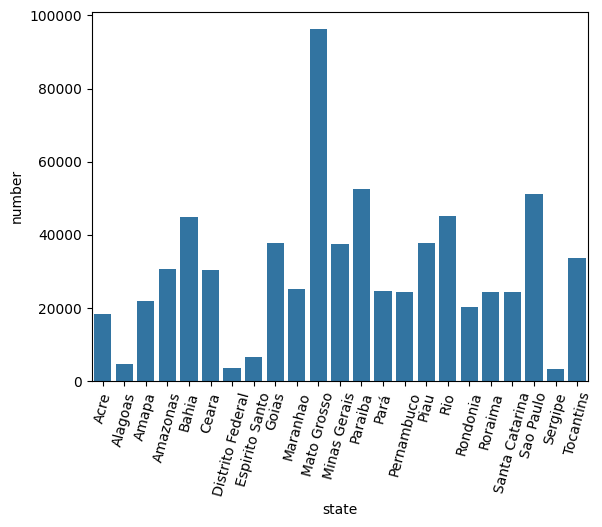

In [37]:
plt.Figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data3)
plt.xticks(rotation=75)

In [40]:
data[data["state"]=="Amazonas"]["number"].sum()

np.float64(30650.129)

In [41]:
data4 = data[data["state"]=="Amazonas"]

In [43]:
data5 = data4.groupby("year")["number"].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

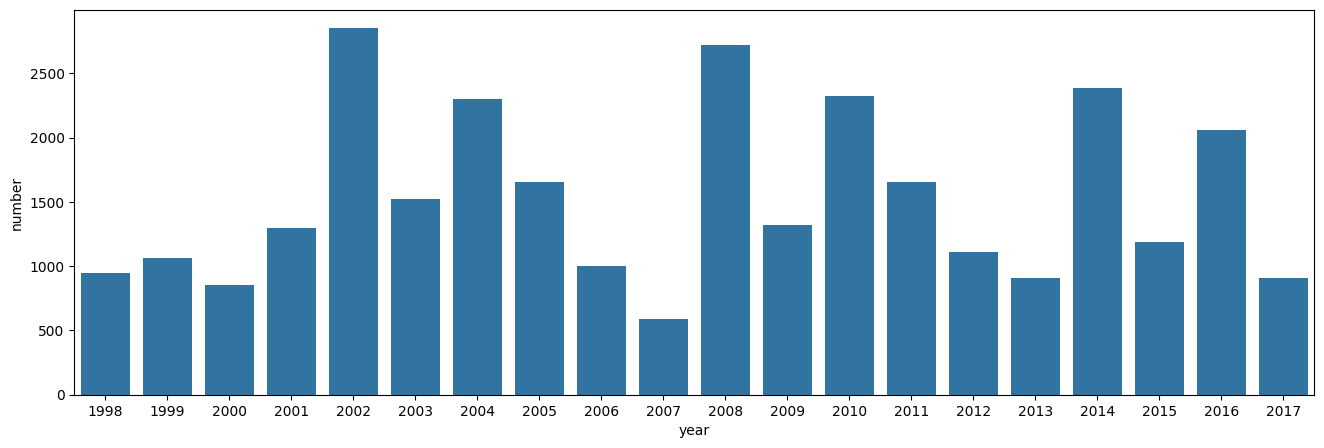

In [45]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data5)

In [48]:
data6 = data[data["state"]=="Amazonas"]

In [ ]:
data6.groupby(data6["date"].dt.dayofweek)["number"].sum()

date
0    1886.601
1    6474.217
2    3910.177
3    5754.802
4    5446.480
5    4162.666
6    3015.186
Name: number, dtype: float64

In [51]:
import calendar
day = [calendar.day_name[x] for x in range(0,7)]
day

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [52]:
day = data6.groupby(data6["date"].dt.dayofweek)["number"].sum()
day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()

In [53]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='index', ylabel='number'>

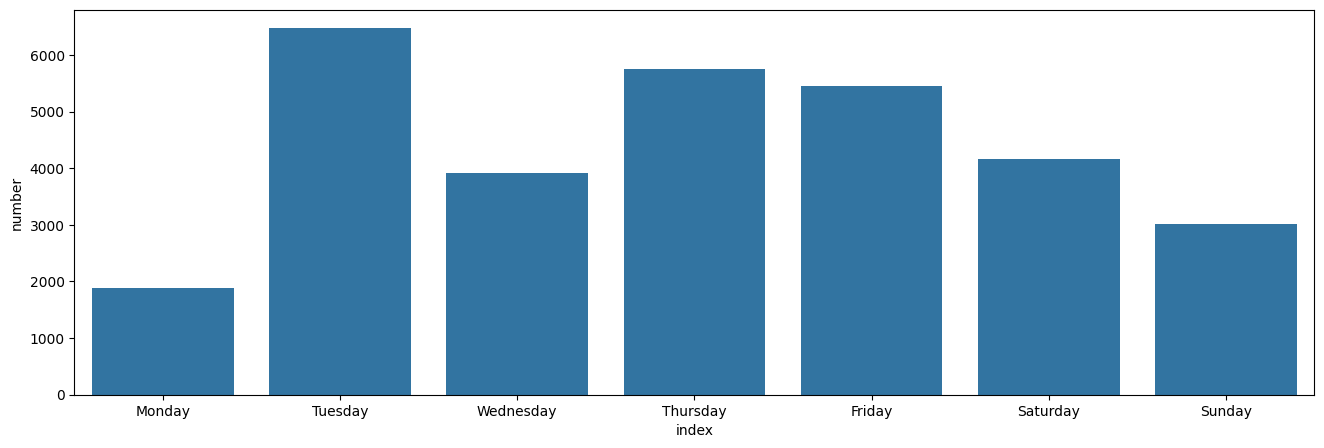

In [55]:
plt.figure(figsize=(16,5))
sns.barplot(x="index",y="number",data=day)

In [62]:
fire = data[data["year"] == 2015].groupby("month_new")["number"].sum().reset_index()

In [63]:
fire

,month_new,number
0,april,2573.000
1,dec,4088.522
2,may,2384.000
3,nov,4034.518
4,oct,4499.525
5,sep,2494.658


<Axes: xlabel='month_new', ylabel='number'>

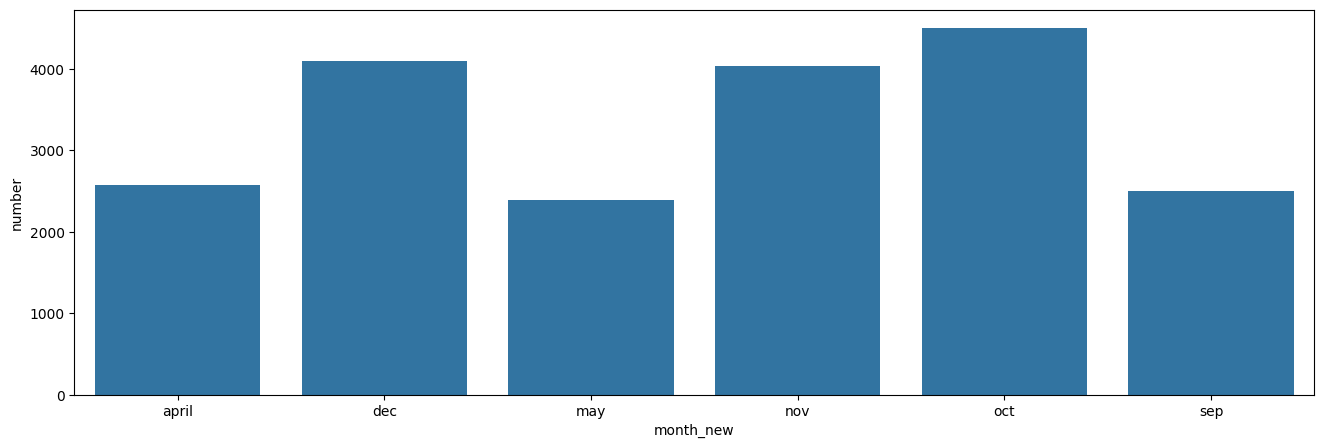

In [64]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number",data=fire)

In [71]:
data8 = data.groupby("state")["number"].mean().sort_values(ascending=False).reset_index()

In [72]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


<Axes: xlabel='state', ylabel='number'>

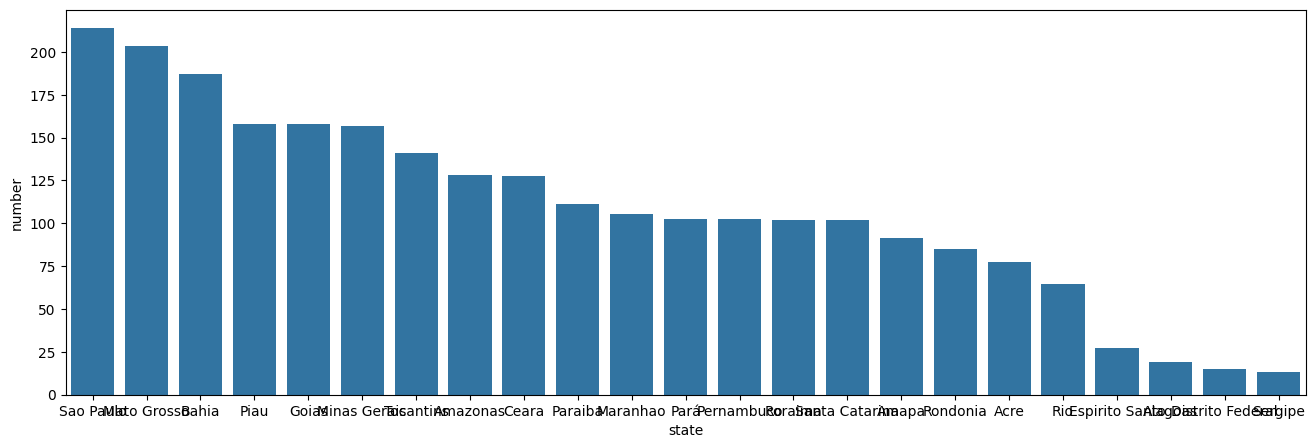

In [73]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data8)

In [76]:
data[data["month_new"]=="dec"]["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)